In [1]:
from datetime import date, datetime, timedelta
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import sys
import datetime
# sys.path.insert(0, "../tools")
from covid19_DTM.data.mobility import * # contains all necessary functions
from covid19_DTM.visualization.output import *
from covid19_DTM.data.sciensano import get_sciensano_COVID19_data_spatial, get_sciensano_COVID19_data

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
from covid19_DTM.visualization.utils import moving_avg
df_hosp, df_mort, df_cases, df_vacc = get_sciensano_COVID19_data(update=False)
sciensano_df_public = moving_avg(df_hosp[['H_in']].groupby('date').sum(), dropna=True)
sciensano_values_public = sciensano_df_public.values
sciensano_dates_public = sciensano_df_public.index + pd.Timedelta(hours=12)

# Timeline of global and national events

## 2020

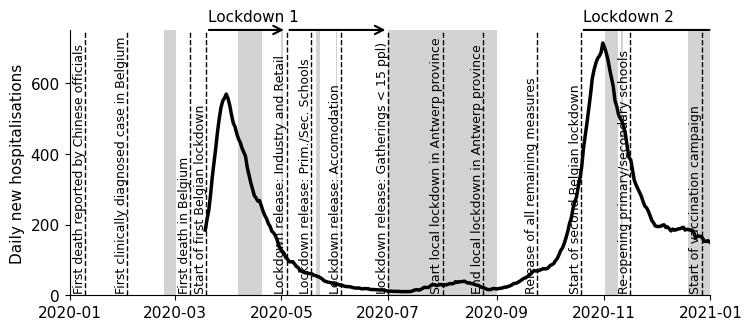

In [33]:
############################
# Copied from timeline.pdf #
############################

show_lockdown=True
show_waves=False

start_date = datetime.datetime(2020, 1, 1, 0, 0)
end_date = datetime.datetime(2021,1, 1, 0, 0)

# Prior to the first lockdown
t1 = pd.Timestamp(2020, 1, 10, 0, 0)
t1_name = 'First death reported by Chinese officials'
t2 = pd.Timestamp(2020, 2, 3, 0, 0) 
t2_name = 'First clinically diagnosed case in Belgium'
t3 = pd.Timestamp(2020, 3, 10, 0, 0) 
t3_name = 'First death in Belgium'
# First lockdown
t4 = pd.Timestamp(2020, 3, 19, 0, 0) 
t4_name = 'Start of first Belgian lockdown'
t5 = pd.Timestamp(2020, 5, 4, 0, 0) #
t5_name = 'Lockdown release: Industry and Retail'
t6 = pd.Timestamp(2020, 5, 18, 0, 0) #
t6_name = 'Lockdown release: Prim./Sec. Schools'
t7 = pd.Timestamp(2020, 6, 4, 0, 0) #
t7_name = 'Lockdown release: Accomodation'
t8 = pd.Timestamp(2020, 7, 1, 0, 0)
t8_name = 'Lockdown release: Gatherings < 15 ppl)'
# In between lockdowns
t9 = pd.Timestamp(2020, 8, 1, 0, 0)
t9_name = 'Start local lockdown in Antwerp province'
t10 = pd.Timestamp(2020, 8, 24, 0, 0)
t10_name = 'End local lockdown in Antwerp province'
t11 = pd.Timestamp(2020, 10, 19, 0, 0)
t11_name = 'Start of second Belgian lockdown'
t12 = pd.Timestamp(2020, 11, 16, 0, 0)
t12_name = 'Re-opening primary/secondary schools'
t13 = pd.Timestamp(2020, 9, 24, 0, 0)
t13_name = 'Release of all remaining measures'
t14 = pd.Timestamp(2020, 12, 27, 0, 0)
t14_name = 'Start of vaccination campaign'


fig, ax = plt.subplots(figsize=(8.27,8.27/2.4))
ax.grid(False)
ticklabelsize = 11
ax.set_xlim(start_date, end_date)
ylim=750
ax.set_ylim(0, ylim)

# Overlay hospitalisations
ax.set_ylabel('Daily new hospitalisations', size=ticklabelsize)
plt.setp(ax.get_xticklabels(), fontsize=ticklabelsize)
ax.plot(sciensano_dates_public, sciensano_values_public, linewidth=2.5, color='black')
plt.setp(ax.get_yticklabels(), fontsize=ticklabelsize)

week_color='white'#'white'
weekend_color='white'#'lightgrey'
vacation_color='lightgrey'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)
# ax.set_title('test', size=14)

# Add arrows denoting lockdown periods
if show_lockdown:
    label_lockdown_size = 11
    label_lockdown_move_up = 25
    arrow_height = ylim
    # First lockdown
    ax.annotate(text='', xy=(t4, arrow_height), xytext=(t5,arrow_height), \
                arrowprops=dict(arrowstyle='<-',linewidth=1.5))
    ax.text(t4 + pd.Timedelta(days=1), \
            ylim + label_lockdown_move_up, 'Lockdown 1', size=label_lockdown_size)
    # Lockdown release
    ax.annotate(text='', xy=(t5, arrow_height), xytext=(t8,arrow_height), \
                arrowprops=dict(arrowstyle='<-',linewidth=1.5))
    #ax.text(t5 + pd.Timedelta(days=21), \
    #        ylim + label_lockdown_move_up, '', size=label_lockdown_size)
    # Second lockdown
    label_lockdown1_move_right = -2.5 # days
    ax.annotate(text='', xy=(t11, arrow_height), xytext=(pd.Timestamp('2021-01-02'),arrow_height), \
                arrowprops=dict(arrowstyle='-',linewidth=1.5))
    ax.text(t11 + pd.Timedelta(days=1), \
            ylim + label_lockdown_move_up, 'Lockdown 2', size=label_lockdown_size)

# Add vertically dashed lines
linestyle='--'
color='k'
linewidth=1
label_size = 9
label_height = 15
label_move_left = 7 # days

# wave 1
ax.axvline(t1, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t1-pd.Timedelta(days=label_move_left), label_height, t1_name, rotation=90, size=label_size)

ax.axvline(t2, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t2-pd.Timedelta(days=label_move_left), label_height, t2_name, rotation=90, size=label_size)

ax.axvline(t3, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t3-pd.Timedelta(days=label_move_left), label_height, t3_name, rotation=90, size=label_size)

ax.axvline(t4, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t4-pd.Timedelta(days=label_move_left), label_height, t4_name, rotation=90, size=label_size)

ax.axvline(t5, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t5-pd.Timedelta(days=label_move_left), label_height, t5_name, rotation=90, size=label_size)

ax.axvline(t6, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t6-pd.Timedelta(days=label_move_left), label_height, t6_name, rotation=90, size=label_size)

ax.axvline(t7, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t7-pd.Timedelta(days=label_move_left), label_height, t7_name, rotation=90, size=label_size)

ax.axvline(t8, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t8-pd.Timedelta(days=label_move_left), label_height, t8_name, rotation=90, size=label_size)

ax.axvline(t9, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t9-pd.Timedelta(days=label_move_left), label_height, t9_name, rotation=90, size=label_size)

ax.axvline(t10, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t10-pd.Timedelta(days=label_move_left), label_height, t10_name, rotation=90, size=label_size)

ax.axvline(t11, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t11-pd.Timedelta(days=label_move_left), label_height, t11_name, rotation=90, size=label_size)

ax.axvline(t12, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t12-pd.Timedelta(days=label_move_left), label_height, t12_name, rotation=90, size=label_size)

ax.axvline(t13, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t13-pd.Timedelta(days=label_move_left), label_height, t13_name, rotation=90, size=label_size)

ax.axvline(t14, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t14-pd.Timedelta(days=label_move_left), label_height, t14_name, rotation=90, size=label_size)

plt.savefig('timeline_2020.pdf', bbox_inches='tight')

## 2021

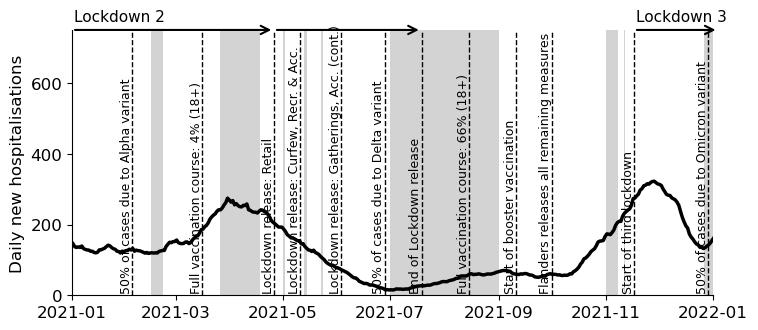

In [34]:
############################
# Copied from timeline.pdf #
############################

show_lockdown = True

t15 = pd.Timestamp(2021, 2, 4, 0, 0)
t15_name = '50% of cases due to Alpha variant'
t16 = pd.Timestamp(2021, 3, 16, 0, 0)
t16_name = 'Full vaccination course: 4% (18+)'
t17 = pd.Timestamp(2021, 4, 26, 0, 0) 
t17_name = 'Lockdown release: Retail'
t18 = pd.Timestamp(2021, 5, 11, 0, 0) 
t18_name = 'Lockdown release: Curfew, Recr. & Acc.'
t19 = pd.Timestamp(2021, 6, 3, 0, 0) 
t19_name = 'Lockdown release: Gatherings, Acc. (cont.)'
#t20 = pd.Timestamp(2021, 6, 11, 0, 0) 
#t20_name = 'Full vaccination course: 25% (18+)'
t21 = pd.Timestamp(2021, 6, 28, 0, 0)
t21_name = '50% of cases due to Delta variant'
t22 = pd.Timestamp(2021, 7, 19, 0, 0) 
t22_name = 'End of Lockdown release'
t23 = pd.Timestamp(2021, 8, 15, 0, 0) 
t23_name = 'Full vaccination course: 66% (18+)'
t24 = pd.Timestamp(2021, 9, 11, 0, 0) 
t24_name = 'Start of booster vaccination'
t25 = pd.Timestamp(2021, 10, 1, 0, 0) 
t25_name = 'Flanders releases all remaining measures'
t26 = pd.Timestamp(2021, 11, 17, 0, 0) 
t26_name = 'Start of third lockdown'
t27 = pd.Timestamp(2021, 12, 29, 0, 0) 
t27_name = '50% of cases due to Omicron variant'

start_date = datetime.datetime(2021, 1, 1, 0, 0)
end_date = datetime.datetime(2022, 1, 1, 0, 0)
fig, ax = plt.subplots(figsize=(8.27,8.27/2.4))
ax.grid(False)
ticklabelsize = 12
ax.set_xlim(start_date, end_date)
ylim=750 
ax.set_ylim(0, ylim)

# Overlay hospitalisations
ax.set_ylabel('Daily new hospitalisations', size=ticklabelsize)
plt.setp(ax.get_xticklabels(), fontsize=ticklabelsize)
ax.plot(sciensano_dates_public, sciensano_values_public, linewidth=2.5, color='black')
plt.setp(ax.get_yticklabels(), fontsize=ticklabelsize)

color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

# Add arrows denoting lockdown periods
if show_lockdown:
    arrow_height = ylim
    # Lockdown light
    ax.annotate(text='', xy=(pd.Timestamp('2021-01-01'), arrow_height), xytext=(t17,arrow_height), \
                arrowprops=dict(arrowstyle='<-', linewidth=1.5))
    ax.text(pd.Timestamp('2021-01-01') + pd.Timedelta(days=1), \
            ylim + label_lockdown_move_up, 'Lockdown 2', size=label_lockdown_size)
    # Lockdown release
    ax.annotate(text='', xy=(t17, arrow_height), xytext=(t22,arrow_height), \
                arrowprops=dict(arrowstyle='<-', linewidth=1.5))
    # Lockdown release
    ax.annotate(text='', xy=(t26, arrow_height), xytext=(pd.Timestamp('2022-01-04'),arrow_height), \
                arrowprops=dict(arrowstyle='<-', linewidth=1.5))
    ax.text(t26 + pd.Timedelta(days=1), \
            ylim + label_lockdown_move_up, 'Lockdown 3', size=label_lockdown_size)
    
ax.axvline(t15, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t15 + pd.Timedelta(days=-label_move_left), label_height, t15_name, rotation=90, size=label_size)

ax.axvline(t16, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t16 + pd.Timedelta(days=-label_move_left), label_height, t16_name, rotation=90, size=label_size)

ax.axvline(t17, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t17 + pd.Timedelta(days=-label_move_left), label_height, t17_name, rotation=90, size=label_size)

ax.axvline(t18, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t18 + pd.Timedelta(days=-label_move_left), label_height, t18_name, rotation=90, size=label_size)

ax.axvline(t19, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t19 + pd.Timedelta(days=-label_move_left), label_height, t19_name, rotation=90, size=label_size)

#ax.axvline(t20, linestyle=linestyle, color=color, linewidth=linewidth)
#ax.text(t20 + pd.Timedelta(days=-label_move_left), label_height, t20_name, rotation=90, size=label_size)

ax.axvline(t21, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t21 + pd.Timedelta(days=-label_move_left), label_height, t21_name, rotation=90, size=label_size)

ax.axvline(t22, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t22 + pd.Timedelta(days=-label_move_left), label_height, t22_name, rotation=90, size=label_size)

ax.axvline(t23, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t23 + pd.Timedelta(days=-label_move_left), label_height, t23_name, rotation=90, size=label_size)

ax.axvline(t24, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t24 + pd.Timedelta(days=-label_move_left), label_height, t24_name, rotation=90, size=label_size)

ax.axvline(t25, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t25 + pd.Timedelta(days=-label_move_left), label_height, t25_name, rotation=90, size=label_size)

ax.axvline(t26, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t26 + pd.Timedelta(days=-label_move_left), label_height, t26_name, rotation=90, size=label_size)

ax.axvline(t27, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t27 + pd.Timedelta(days=-label_move_left), label_height, t27_name, rotation=90, size=label_size)

plt.savefig('timeline_2021.pdf', dpi=400, bbox_inches='tight')